# Importación de los datos

In [3]:
# Librerías

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ruta del archivo
file_path = 'https://raw.githubusercontent.com/Dezarti/datos_monografia/main/structured_data/app_data.xlsx'

# Cargar la primera hoja del archivo Excel en un DataFrame
df = pd.read_excel(file_path, sheet_name=0)

# Mostrar las primeras filas del DataFrame
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


# Análisis inicial y limpieza de los datos

In [5]:
# Análisis inicial y limpieza de los datos

# 0. Copia de seguridad
data = df.copy()

# 1. Identificar y manejar valores faltantes
missing_values = data.isnull().sum()

# 2. Conversión de variables categóricas
# Se identifican las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# 3. Normalización o estandarización de datos numéricos
# Se identifican las columnas numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# 4. Análisis exploratorio
# Estadísticas descriptivas de los datos numéricos
descriptive_stats = data.describe()

missing_values, categorical_columns, numerical_columns, descriptive_stats

(Age                                   1
 BMI                                  27
 Sex                                   2
 Height                               26
 Weight                                3
 Length_of_Stay                        4
 Management                            1
 Severity                              1
 Diagnosis_Presumptive                 2
 Diagnosis                             2
 Alvarado_Score                       52
 Paedriatic_Appendicitis_Score        52
 Appendix_on_US                        5
 Appendix_Diameter                   284
 Migratory_Pain                        9
 Lower_Right_Abd_Pain                  8
 Contralateral_Rebound_Tenderness     15
 Coughing_Pain                        16
 Nausea                                8
 Loss_of_Appetite                     10
 Body_Temperature                      7
 WBC_Count                             6
 Neutrophil_Percentage               103
 Segmented_Neutrophils               728
 Neutrophilia   

# Leve análisis descriptivo

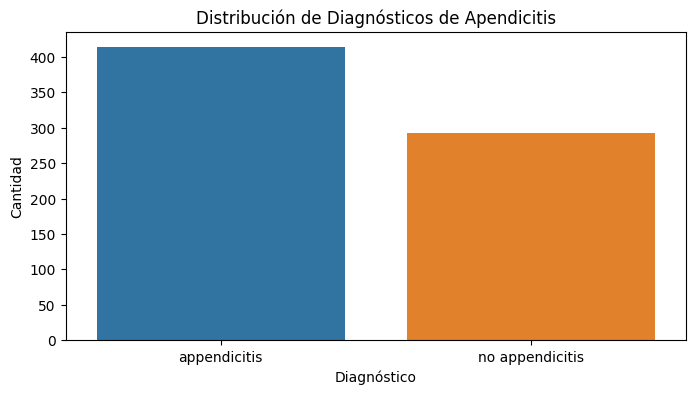

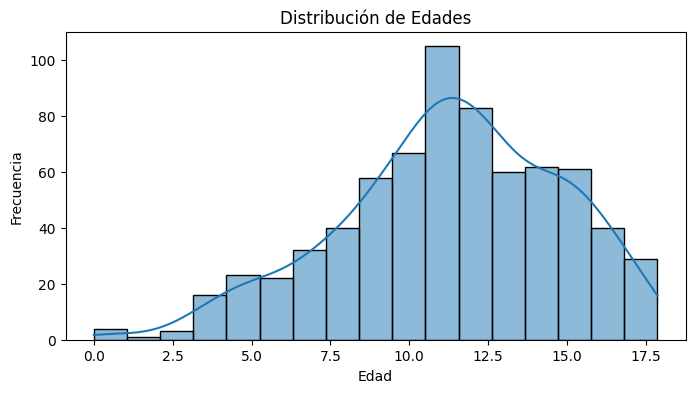

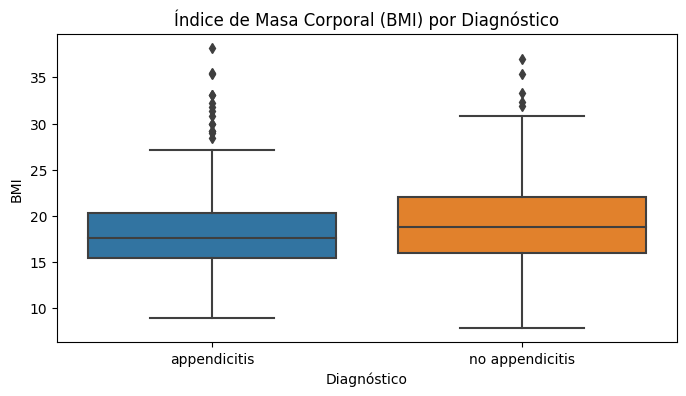

,Age,BMI,Height,Weight,Alvarado_Score,Body_Temperature,WBC_Count
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,11.273848,18.826179,147.827620,43.009504,5.895184,37.405382,12.760411
std,3.514426,4.386370,19.787057,17.389398,2.153092,0.913880,5.401974
min,0.000000,7.827983,53.000000,3.960000,0.000000,26.900000,2.600000
25%,9.190926,15.701180,136.000000,30.000000,4.000000,36.800000,8.400000
50%,11.382615,17.924548,149.000000,41.000000,6.000000,37.200000,12.200000
75%,13.898648,21.002993,162.875000,54.000000,8.000000,37.900000,16.300000
max,17.872690,38.156221,192.000000,103.000000,10.000000,40.200000,37.700000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrando las columnas relevantes para la predicción de apendicitis
relevant_columns = ['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Diagnosis', 'Alvarado_Score', 'Body_Temperature', 'WBC_Count']

# Filtrando el dataframe
filtered_data = data[relevant_columns].dropna()

# Análisis descriptivo y gráficos
# Diagrama de barras para la variable 'Diagnosis'
plt.figure(figsize=(8, 4))
sns.countplot(x='Diagnosis', data=filtered_data)
plt.title('Distribución de Diagnósticos de Apendicitis')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

# Histograma para la variable 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(filtered_data['Age'], kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para 'BMI'
plt.figure(figsize=(8, 4))
sns.boxplot(x='Diagnosis', y='BMI', data=filtered_data)
plt.title('Índice de Masa Corporal (BMI) por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('BMI')
plt.show()

# Descripción estadística de las columnas seleccionadas
descriptive_stats_relevant = filtered_data.describe()
descriptive_stats_relevant

# Balanceo

In [7]:
# Filtrando datos para las categorías 'apendicitis' y 'no apendicitis'
apendicitis_data = filtered_data[filtered_data['Diagnosis'] == 'appendicitis']
no_apendicitis_data = filtered_data[filtered_data['Diagnosis'] == 'no appendicitis']

# Balanceando los datos
min_samples = min(len(apendicitis_data), len(no_apendicitis_data))
balanced_apendicitis = apendicitis_data.sample(min_samples)
balanced_no_apendicitis = no_apendicitis_data.sample(min_samples)

# Combinando los datos balanceados
balanced_data = pd.concat([balanced_apendicitis, balanced_no_apendicitis])

# Verificando el balanceo
balance_check = balanced_data['Diagnosis'].value_counts()
balance_check

appendicitis       292
no appendicitis    292
Name: Diagnosis, dtype: int64

## Verificación del balanceo

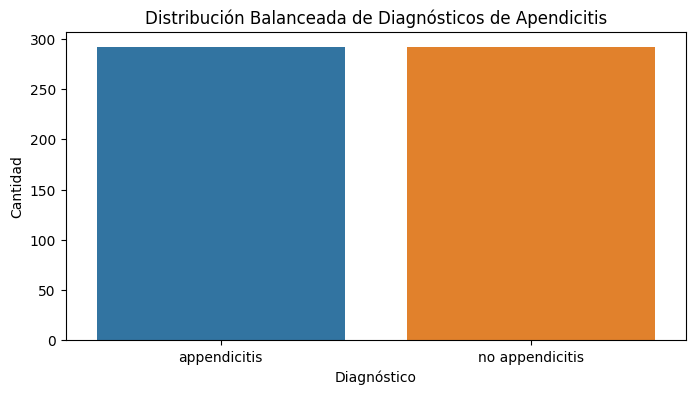

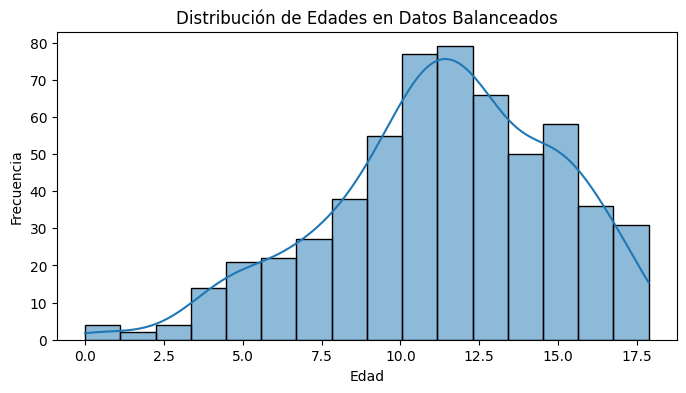

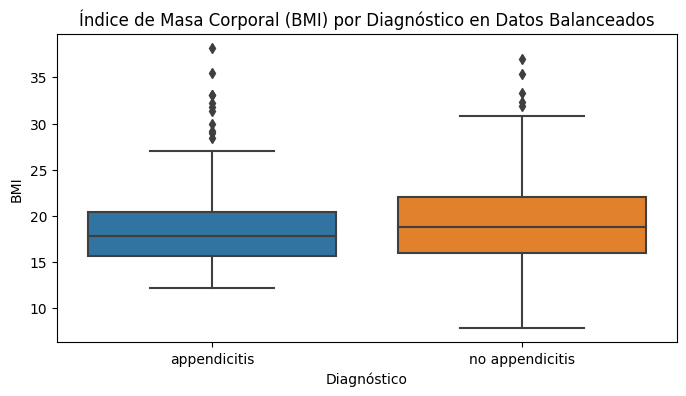

In [8]:
# Generando gráficos para los datos balanceados

# Diagrama de barras para la variable 'Diagnosis' en los datos balanceados
plt.figure(figsize=(8, 4))
sns.countplot(x='Diagnosis', data=balanced_data)
plt.title('Distribución Balanceada de Diagnósticos de Apendicitis')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

# Histograma para la variable 'Age' en los datos balanceados
plt.figure(figsize=(8, 4))
sns.histplot(balanced_data['Age'], kde=True)
plt.title('Distribución de Edades en Datos Balanceados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para 'BMI' en los datos balanceados
plt.figure(figsize=(8, 4))
sns.boxplot(x='Diagnosis', y='BMI', data=balanced_data)
plt.title('Índice de Masa Corporal (BMI) por Diagnóstico en Datos Balanceados')
plt.xlabel('Diagnóstico')
plt.ylabel('BMI')
plt.show()